<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/02_pytorch_classification_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. <a id='toc1_'></a>[Neural Network classification with PyTorch](#toc0_)

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

* Book version of this notebook - https://www.learnpytorch.io/02_pytorch_classification/
* All other resources - https://github.com/mrdbourke/pytorch-deep-learning
* Stuck? Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

**Table of contents**<a id='toc0_'></a>    
- 1. [Neural Network classification with PyTorch](#toc1_)    
  - 1.1. [Check the software and OS version](#toc1_1_)    
  - 1.2. [Make classification data and get it ready](#toc1_2_)    
    - 1.2.1. [Check input and output shapes](#toc1_2_1_)    
    - 1.2.2. [Turn data into tensors and create train and test splits](#toc1_2_2_)    
  - 1.3. [Building a model](#toc1_3_)    
    - 1.3.1. [Setup loss function and optimizer](#toc1_3_1_)    
  - 1.4. [Train model](#toc1_4_)    
    - 1.4.1. [Going from raw logits -> prediction probabilities -> prediction labels](#toc1_4_1_)    
    - 1.4.2. [Building a training and testing loop](#toc1_4_2_)    
  - 1.5. [Make predictions and evaluate the model](#toc1_5_)    
  - 1.6. [Improving a model (from a model perspective)](#toc1_6_)    
    - 1.6.1. [Preparing data to see if our model can fit a straight line](#toc1_6_1_)    
    - 1.6.2. [Adjusting `model_1` to fit a straight line](#toc1_6_2_)    
  - 1.7. [The missing piece: non-linearity](#toc1_7_)    
    - 1.7.1. [Recreating non-linear data (red and blue circles)](#toc1_7_1_)    
    - 1.7.2. [Building a model with non-linearity](#toc1_7_2_)    
    - 1.7.3. [Training a model with non-linearity](#toc1_7_3_)    
    - 1.7.4. [Evaluating a model trained with non-linear activation functions](#toc1_7_4_)    
  - 1.8. [Replicating non-linear activation functions](#toc1_8_)    
  - 1.9. [Putting it all together with a multi-class classification problem](#toc1_9_)    
    - 1.9.1. [Creating a toy multi-class dataset](#toc1_9_1_)    
    - 1.9.2. [Building a multi-class classification model in PyTorch](#toc1_9_2_)    
    - 1.9.3. [Create a loss function and an optimizer for a multi-class classification model](#toc1_9_3_)    
    - 1.9.4. [Getting prediction probabilities for a multi-class PyTorch model](#toc1_9_4_)    
    - 1.9.5. [Creating a training loop and testing loop for a multi-class PyTorch model](#toc1_9_5_)    
    - 1.9.6. [Making and evaluating predictions with a PyTorch multi-class model](#toc1_9_6_)    
  - 1.10. [A few more classification metrics... (to evaluate our classification model)](#toc1_10_)    
  - 1.11. [Exercises & Extra-curriculum](#toc1_11_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1.1. <a id='toc1_1_'></a>[Check the software and OS version](#toc0_)

In [188]:
# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-06-07 12:12:23.862132


In [189]:
# Check to see if we're using a GPU
!nvidia-smi

Wed Jun  7 12:12:24 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.68                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060       WDDM | 00000000:01:00.0  On |                  N/A |
| 32%   36C    P8               22W / 184W|   2048MiB / 12288MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

```
Tue May 30 11:05:02 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.68                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060       WDDM | 00000000:01:00.0  On |                  N/A |
| 32%   38C    P8               22W / 184W|    782MiB / 12288MiB |     23%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+----------------------+
```

In [190]:
# Check your software and os version
import os
print("posix = Linux, nt = windows, java = java")
print("your os name is",os.name)

import platform
print("your os is ",platform.system()+platform.release())

from platform import python_version
print("python version is",python_version())

import torch
print("Pytorch version is",torch.__version__)

print("Are we using a GPU?",torch.cuda.is_available())

posix = Linux, nt = windows, java = java
your os name is nt
your os is  Windows10
python version is 3.9.16
Pytorch version is 2.0.1+cu118
Are we using a GPU? True


## 1.2. <a id='toc1_2_'></a>[Make classification data and get it ready](#toc0_)

In [191]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [192]:
len(X),len(y)

(1000, 1000)

In [193]:
print(f"First 5 smaple of X:\n{X[:5]}")
print(f"First 5 smaple of y:\n{y[:5]}")

First 5 smaple of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 smaple of y:
[1 1 1 1 0]


In [194]:
# Make dataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [195]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

### Visualize data

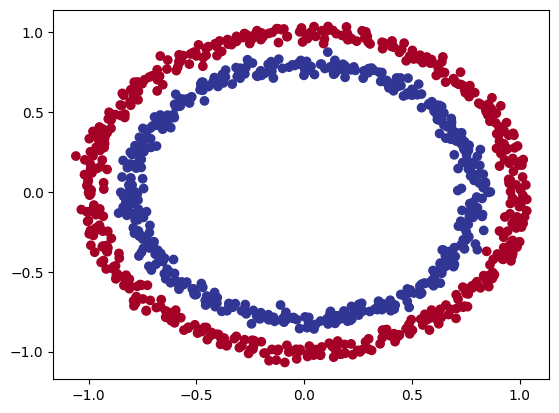

In [196]:
# Visualize, Visualize, Visualize
# reference: https://realpython.com/visualizing-python-plt-scatter/
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], 
            y=X[:,1], 
            c=y, 
            cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals. - https://scikit-learn.org/stable/datasets/toy_dataset.html

### 1.2.1. <a id='toc1_2_1_'></a>[Check input and output shapes](#toc0_)

In [197]:
X.shape, y.shape

((1000, 2), (1000,))

### 1.2.2. <a id='toc1_2_2_'></a>[Turn data into tensors and create train and test splits](#toc0_)

In [198]:
# Import library
import torch

In [199]:
# Checking data type
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [200]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X[:5]), type(y[:5])

(torch.Tensor, torch.Tensor)

In [201]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [202]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  
                                                    random_state=42)

In [203]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [204]:
n_samples

1000

## 1.3. <a id='toc1_3_'></a>[Building a model](#toc0_)

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [205]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [206]:
X_train.shape

torch.Size([800, 2])

In [207]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [208]:
from sklearn import datasets
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Creaate 2 nn.Linear Layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # take in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # take in features from previous Layer and outputs a single

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x))    # x -> Layer_1 -> Layer_2 -> output
    
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [209]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [210]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [211]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [212]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device)).squeeze()
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([-0., -0., 0., -0., 0., 0., 0., 0., 0., -0.], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 1.3.1. <a id='toc1_3_1_'></a>[Setup loss function and optimizer](#toc0_)

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For some common choices of loss functions and optimizers - https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer
* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this article - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a 
* For a defintion on what a logit is in deep learning - https://stackoverflow.com/a/52111173/7900723 
* For different optimizers see `torch.optim`

In [213]:
# Setup the loss function
# Loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
# Reference: https://blog.csdn.net/qq_22210253/article/details/85222093
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [214]:
# Calculate accurary - out of 100 example, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()  # torch.eq(): https://pytorch.org/docs/stable/generated/torch.eq.html
                                                        # item(): https://pytorch.org/docs/stable/generated/torch.Tensor.item.html
    acc = (correct/len(y_pred)) * 100
    return acc

## 1.4. <a id='toc1_4_'></a>[Train model](#toc0_)

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent) 

### 1.4.1. <a id='toc1_4_1_'></a>[Going from raw logits -> prediction probabilities -> prediction labels](#toc0_)

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [215]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [216]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [217]:
# Use sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [218]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs) # Convert the values to 0 and 1
print("y_preds = ",y_preds)

# In full (logit -> pred prob -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print("y_pred_labels = ",y_pred_labels)

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
print(y_preds.squeeze())

y_preds =  tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')
y_pred_labels =  tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)
tensor([True, True, True, True, True], device='cuda:0')
tensor([0., 0., 1., 0., 1.], device='cuda:0')


In [219]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 1.4.2. <a id='toc1_4_2_'></a>[Building a training and testing loop](#toc0_)

In [220]:
torch.manual_seed(42)
torch.cuda.manual_seed(42) 

# If you are working with a multi-GPU model, this function is insufficient to get determinism. To seed all GPUs, use manual_seed_all().

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # ==========Training==========
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))   # turn logits -> pred probs -> pre labels

    # 2. Calculate loss/ accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train)  # nn.BCELoss expect prediction probabilities as input
    loss = loss_fn(y_logits, y_train)   # nn.BCEWithLogitsLoss expects raw logits as 
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # ==========Testing==========
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69440, Test acc: 58.00%
Epoch: 10 | Loss: 0.69436, Acc: 50.00% | Test loss: 0.69389, Test acc: 50.00%
Epoch: 20 | Loss: 0.69514, Acc: 49.88% | Test loss: 0.69770, Test acc: 50.50%
Epoch: 30 | Loss: 0.69519, Acc: 52.88% | Test loss: 0.69850, Test acc: 48.50%
Epoch: 40 | Loss: 0.69542, Acc: 45.12% | Test loss: 0.69842, Test acc: 43.50%
Epoch: 50 | Loss: 0.69559, Acc: 50.38% | Test loss: 0.69873, Test acc: 51.50%
Epoch: 60 | Loss: 0.69421, Acc: 53.75% | Test loss: 0.69712, Test acc: 46.50%
Epoch: 70 | Loss: 0.69486, Acc: 43.88% | Test loss: 0.69732, Test acc: 40.50%
Epoch: 80 | Loss: 0.69422, Acc: 50.50% | Test loss: 0.69675, Test acc: 50.50%
Epoch: 90 | Loss: 0.69475, Acc: 54.87% | Test loss: 0.69576, Test acc: 54.50%


## 1.5. <a id='toc1_5_'></a>[Make predictions and evaluate the model](#toc0_)

From the metrics it looks like our model isn't learning anything... 

So to inspect it let's make some predictions and make them visual! 

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py 

In [221]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("help_function.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

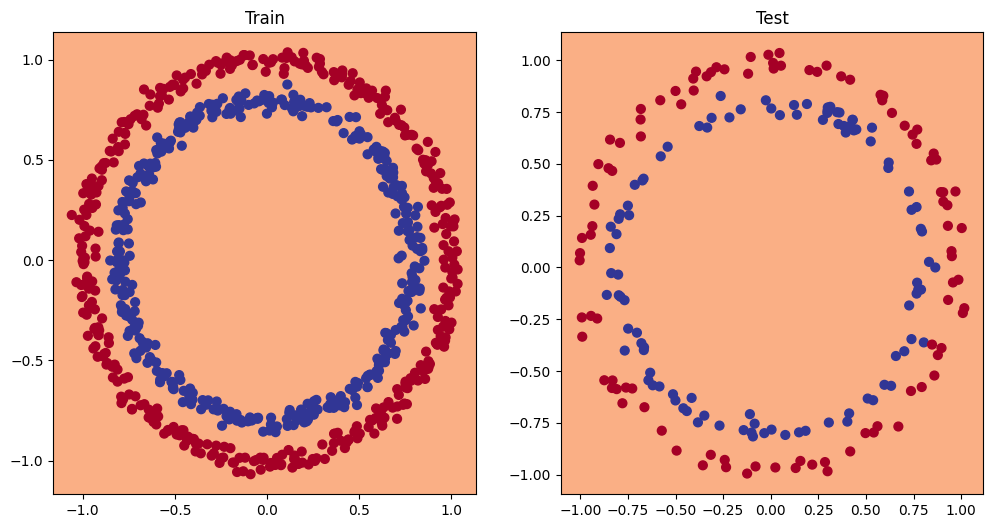

In [222]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 

## 1.6. <a id='toc1_6_'></a>[Improving a model (from a model perspective)](#toc0_)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units 
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function 

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [223]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [224]:
# Create a model
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=20)
        self.layer_3 = nn.Linear(in_features=20, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z) 
        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
)

In [225]:

# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer 
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

In [226]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42) 

# If you are working with a multi-GPU model, this function is insufficient to get determinism. To seed all GPUs, use manual_seed_all().

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # ==========Training==========
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

    # 2. Calculate loss/ accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train)  # nn.BCELoss expect prediction probabilities as input
    loss = loss_fn(y_logits, y_train)   # nn.BCEWithLogitsLoss expects raw logits as 
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # ==========Testing==========
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69460, Acc: 51.62% | Test loss: 0.69721, Test acc: 49.50%
Epoch: 10 | Loss: 0.69361, Acc: 45.88% | Test loss: 0.69613, Test acc: 47.00%
Epoch: 20 | Loss: 0.69429, Acc: 59.25% | Test loss: 0.69475, Test acc: 53.00%
Epoch: 30 | Loss: 0.69381, Acc: 50.00% | Test loss: 0.69332, Test acc: 50.00%
Epoch: 40 | Loss: 0.69402, Acc: 51.25% | Test loss: 0.69384, Test acc: 55.00%
Epoch: 50 | Loss: 0.69369, Acc: 47.25% | Test loss: 0.69671, Test acc: 46.00%
Epoch: 60 | Loss: 0.69417, Acc: 53.25% | Test loss: 0.69881, Test acc: 47.50%
Epoch: 70 | Loss: 0.69387, Acc: 48.25% | Test loss: 0.69714, Test acc: 48.50%
Epoch: 80 | Loss: 0.69352, Acc: 50.00% | Test loss: 0.69369, Test acc: 50.00%
Epoch: 90 | Loss: 0.69382, Acc: 45.12% | Test loss: 0.69296, Test acc: 50.00%
Epoch: 100 | Loss: 0.69337, Acc: 49.88% | Test loss: 0.69268, Test acc: 51.00%
Epoch: 110 | Loss: 0.69325, Acc: 50.00% | Test loss: 0.69396, Test acc: 51.50%
Epoch: 120 | Loss: 0.69360, Acc: 46.88% | Test loss: 0.69587, T

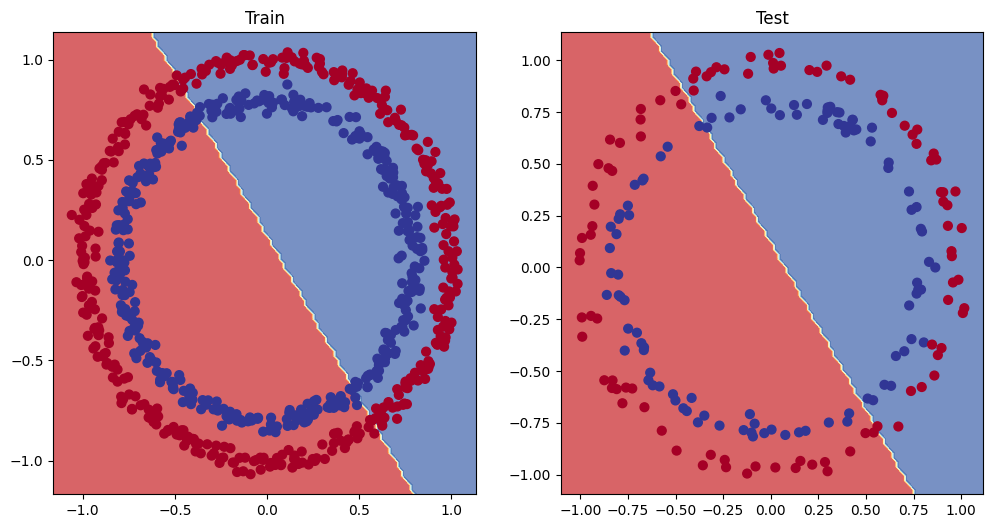

In [227]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) 

### 1.6.1. <a id='toc1_6_1_'></a>[Preparing data to see if our model can fit a straight line](#toc0_)

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [228]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [229]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

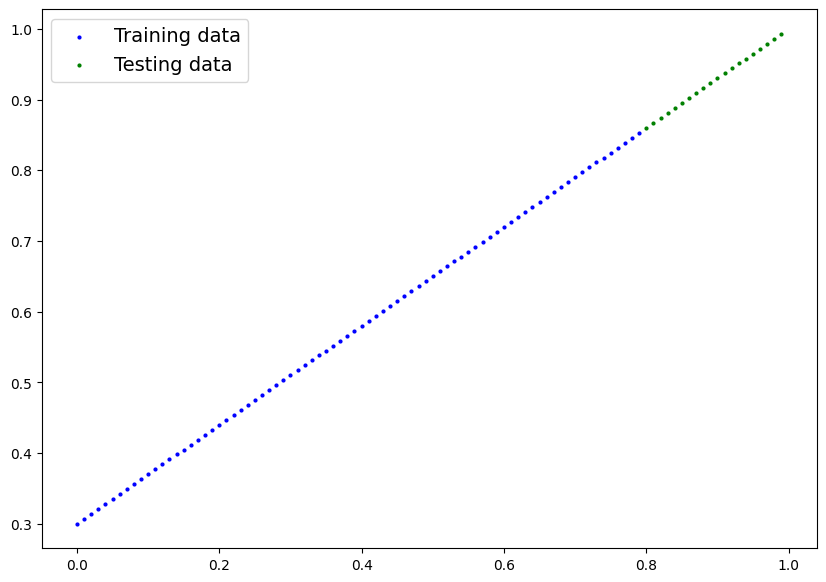

In [230]:
plot_predictions(train_data=X_train_regression, 
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

### 1.6.2. <a id='toc1_6_2_'></a>[Adjusting `model_1` to fit a straight line](#toc0_)

In [232]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [233]:
# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                            lr=0.01)

In [234]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.86866 | Test loss: 1.18774
Epoch: 100 | Loss: 0.05785 | Test loss: 0.00480
Epoch: 200 | Loss: 0.04887 | Test loss: 0.00272
Epoch: 300 | Loss: 0.04426 | Test loss: 0.00357
Epoch: 400 | Loss: 0.04140 | Test loss: 0.00620
Epoch: 500 | Loss: 0.03931 | Test loss: 0.00755
Epoch: 600 | Loss: 0.03706 | Test loss: 0.00619
Epoch: 700 | Loss: 0.03588 | Test loss: 0.00552
Epoch: 800 | Loss: 0.03332 | Test loss: 0.00646
Epoch: 900 | Loss: 0.03497 | Test loss: 0.00692


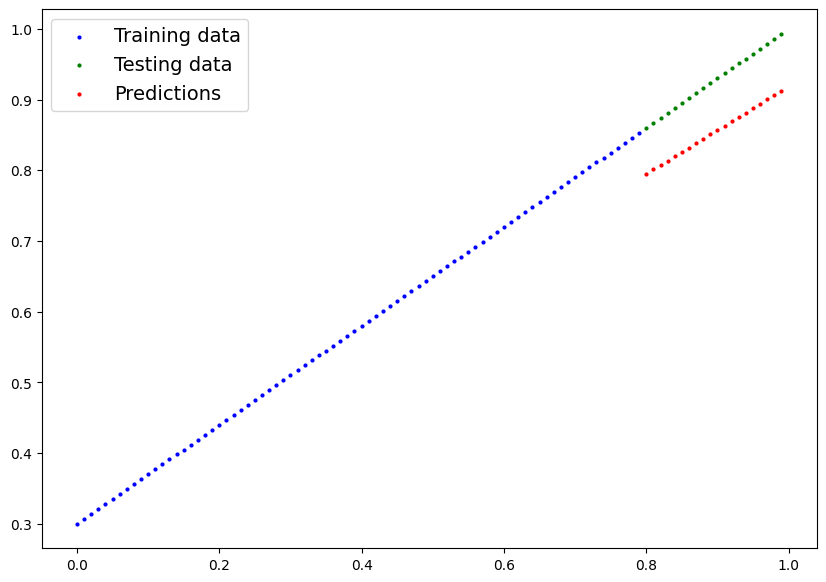

In [235]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(), 
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu()); 

## 1.7. <a id='toc1_7_'></a>[The missing piece: non-linearity](#toc0_)

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 1.7.1. <a id='toc1_7_1_'></a>[Recreating non-linear data (red and blue circles)](#toc0_)

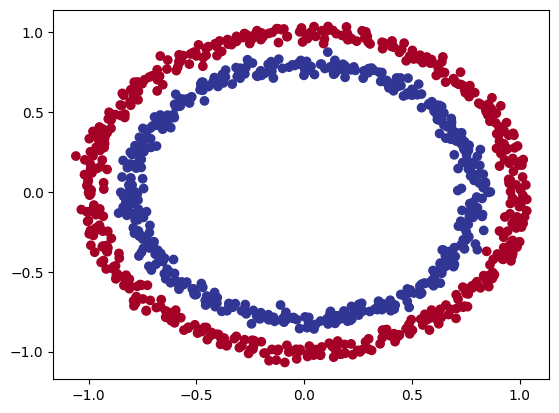

In [236]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Convert data to tensors and then to train and test splits
import torch

### 1.7.2. <a id='toc1_7_2_'></a>[Building a model with non-linearity](#toc0_)

* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

### 1.7.3. <a id='toc1_7_3_'></a>[Training a model with non-linearity](#toc0_)

### 1.7.4. <a id='toc1_7_4_'></a>[Evaluating a model trained with non-linear activation functions](#toc0_)

**Challenge:** Can you improve model_3 to do better than 80% accuracy on the test data?

## 1.8. <a id='toc1_8_'></a>[Replicating non-linear activation functions](#toc0_)

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

## 1.9. <a id='toc1_9_'></a>[Putting it all together with a multi-class classification problem](#toc0_)

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 1.9.1. <a id='toc1_9_1_'></a>[Creating a toy multi-class dataset](#toc0_)

### 1.9.2. <a id='toc1_9_2_'></a>[Building a multi-class classification model in PyTorch](#toc0_)

### 1.9.3. <a id='toc1_9_3_'></a>[Create a loss function and an optimizer for a multi-class classification model](#toc0_)

### 1.9.4. <a id='toc1_9_4_'></a>[Getting prediction probabilities for a multi-class PyTorch model](#toc0_)

In order to evaluate and train and test our model, we need to convert our model's outputs (logtis) to predicition probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

### 1.9.5. <a id='toc1_9_5_'></a>[Creating a training loop and testing loop for a multi-class PyTorch model](#toc0_)

### 1.9.6. <a id='toc1_9_6_'></a>[Making and evaluating predictions with a PyTorch multi-class model](#toc0_)

## 1.10. <a id='toc1_10_'></a>[A few more classification metrics... (to evaluate our classification model)](#toc0_)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall 
* F1-score
* Confusion matrix
* Classification report

See this article for when to use precision/recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

If you want access to a lot of PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/latest/ 

## 1.11. <a id='toc1_11_'></a>[Exercises & Extra-curriculum](#toc0_)

See exercises and extra-curriculum here: https://www.learnpytorch.io/02_pytorch_classification/#exercises